## Rotations, scaling, and basic data handling

### 1a. Rotations and Scaling of Vectors in 2D

We can rotate and scale vectors using matrices. We'll focus on 2D vectors to make things easy to visualize, but everything here can be generalized to arbitrary dimensions. 

- **Rotation Matrix**:
  We can rotate a vector by an angle $\theta$ using the matrix:


  $$
  R(\theta) = \begin{pmatrix}
  \cos \theta & -\sin \theta \\
  \sin \theta & \cos \theta
  \end{pmatrix}
  $$

  
  This matrix rotates vectors counterclockwise by the angle $\theta$.

- **Scaling Matrix**:
  To scale a vector uniformly (by the same factor in all directions), we use the scaling matrix:
  $$
  S(s) = \begin{pmatrix}
  s & 0 \\
  0 & s
  \end{pmatrix}
  $$
  This matrix scales vectors by the factor $s$. Of course, this is the same as multiplying the vector by the scalar #s#.

We can use these matrices to rotate and scale a vector, and visualize it to make sure it is doing what we expect.

I've confused myself in the past, so I'm trying to use # to separate parts I've edited

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Function to apply rotation and scaling to a 2D vector
def transform_and_plot(theta_deg=0, scale=1):
    # Define the original vector
    vec = np.array([1, 0])  # Unit vector along x-axis
#
    vec2 = np.array([0,1])
#    
    # Convert degrees to radians
    theta_rad = np.radians(theta_deg)
    
    # Define the rotation matrix
    R = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                  [np.sin(theta_rad), np.cos(theta_rad)]])
    
    # Define the scaling matrix
    S = np.array([[scale, 0],
                  [0, scale]])
    
    # Apply rotation and scaling
    transformed_vec = S @ R @ vec
#
    transformed_vec2 = S @ R @ vec2
#    
    
    # Plot the original and transformed vectors
    plt.figure(figsize=(6, 6))
    plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original')
    plt.quiver(0, 0, transformed_vec[0], transformed_vec[1], angles='xy', scale_units='xy', scale=1, color='red', label='Transformed')
    #
    plt.quiver(0, 0, vec2[0], vec2[1], angles = 'xy', scale_units='xy', scale=1, color='green', label ='Original V2')
    plt.quiver(0, 0, transformed_vec2[0], transformed_vec2[1], angles='xy', scale_units='xy', scale=1, color='purple', label='Transformed V2')
    #
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
#    
    plt.legend(['Original Vector', 'Transformed Vector', 'Original V2', 'Transformed V2'])
    plt.show()

# Create sliders for rotation and scaling
interact(transform_and_plot, 
         theta_deg=FloatSlider(min=0, max=360, step=1, value=0, description="Rotation (degrees)"), 
         scale=FloatSlider(min=0.1, max=2, step=0.1, value=1, description="Scaling"));


interactive(children=(FloatSlider(value=0.0, description='Rotation (degrees)', max=360.0, step=1.0), FloatSlid…

### Assignment 1: Add a vector pointing along the y-axis to the above plot, including the rotation.

### 1b. Eigenvalues and Eigenvectors as Special Rotations

When we apply a transformation to a vector, the transformation can often be understood as a combination of rotations and scalings. Eigenvectors and eigenvalues are special in that they allow us to interpret the transformation more easily.

- **Eigenvectors** are special vectors that **do not change direction** under the transformation. They are like new axes (rotated from the original basis).
- **Eigenvalues** are the factors by which the length of these eigenvectors is scaled under the transformation.

For a matrix $A$, we find eigenvectors and eigenvalues by solving the equation:
$$
A \mathbf{v} = \lambda \mathbf{v}
$$
where $\mathbf{v}$ is an eigenvector, and $\lambda$ is the corresponding eigenvalue.

We can get the eigenvalues and eigenvectors in `numpy` using the `linalg` package.

Eigenvalues: [4.41421356 1.58578644]
Eigenvectors:
 [[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]


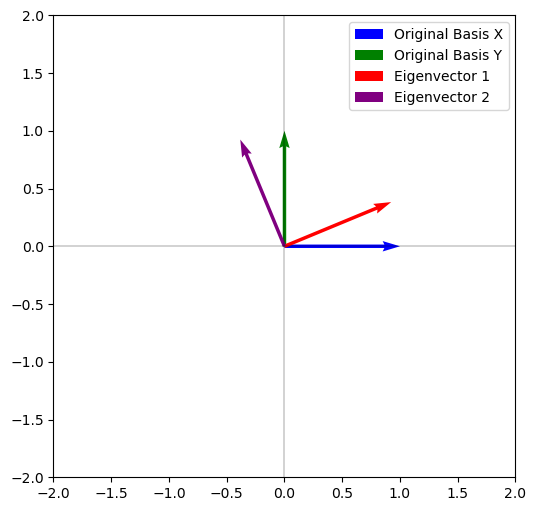

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# Define a 2x2 matrix
A = np.array([[4, 1],
              [1, 2]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = eig(A)

# Print eigenvalues and eigenvectors
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Plot original basis vectors
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='blue', label='Original Basis X')
plt.quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, color='green', label='Original Basis Y')

# Plot eigenvectors
for i in range(2):
    vec = eigenvectors[:, i]
    color = ['red', 'purple']
    plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color=color[i], label=f'Eigenvector {i+1}')

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.axhline(0, color='black',linewidth=0.25)
plt.axvline(0, color='black',linewidth=0.25)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(['Original Basis X', 'Original Basis Y', 'Eigenvector 1', 'Eigenvector 2'])
plt.show()


### 1c. Unitary Transformations of a Potential Energy Function

The harmonic part of the potential energy can be represented by a quadratic form, which in matrix notation looks like:
$$
U = \frac{1}{2} \begin{pmatrix} Q_1 & Q_2 \end{pmatrix}
\begin{pmatrix}
K_{11} & K_{12} \\
K_{12} & K_{22}
\end{pmatrix}
\begin{pmatrix} Q_1 \\ Q_2 \end{pmatrix}
$$
Here, $K_{11}, K_{12}, K_{22}$ are constants that describe the system's stiffness and coupling in different directions. Again this can be generalized to arbitrary dimensions.

- If the matrix is symmetric (i.e., $K_{12} = K_{21}$ ) or Hermitian, we can diagonalize it using a unitary transformation (rotation of the basis).
- The diagonal form simplifies the potential energy, making it easier to analyze.

We will:
1. Use **Sympy** to symbolically compute the eigenvalues and eigenvectors of the matrix.
2. Diagonalize the potential energy using the eigenvectors.
3. Visualize the potential energy surface with **Matplotlib**.
4. Use **IPyWidgets** to explore how changing the constants \( K_{11}, K_{12}, K_{22} \) affects the potential energy and its principal axes.


In [3]:
import sympy as sp

# Define symbolic variables
Q1, Q2, K11, K12, K22 = sp.symbols('Q1 Q2 K11 K12 K22')

# Define the potential energy matrix
K = sp.Matrix([[K11, K12],
               [K12, K22]])

# Define the vector of coordinates
Q = sp.Matrix([Q1, Q2])

# Define the potential energy expression
U = 1/2 * Q.T * K * Q

# Simplify the potential energy expression
U_simplified = sp.simplify(U[0])
display(U_simplified.expand())

# Compute the eigenvalues and eigenvectors of the matrix
eigenvals = K.eigenvals()
eigenvecs = K.eigenvects()

# Display the eigenvalues and eigenvectors
sp.pprint(eigenvals)
# sp.pprint(eigenvecs) # uncomment for the eigenvectors


0.5*K11*Q1**2 + 1.0*K12*Q1*Q2 + 0.5*K22*Q2**2

⎧               __________________________________                    ________ ↪
⎪              ╱    2                    2      2                    ╱    2    ↪
⎨K₁₁   K₂₂   ╲╱  K₁₁  - 2⋅K₁₁⋅K₂₂ + 4⋅K₁₂  + K₂₂       K₁₁   K₂₂   ╲╱  K₁₁  -  ↪
⎪─── + ─── - ─────────────────────────────────────: 1, ─── + ─── + ─────────── ↪
⎩ 2     2                      2                        2     2                ↪

↪ __________________________   ⎫
↪                  2      2    ⎪
↪ 2⋅K₁₁⋅K₂₂ + 4⋅K₁₂  + K₂₂     ⎬
↪ ──────────────────────────: 1⎪
↪        2                     ⎭


Now, let's visualize the potential energy surface. We'll plot contour lines of the potential energy, and overlay arrows representing the eigenvectors of the matrix.

The eigenvectors represent the directions along which the potential energy is "aligned" and help us understand the principal directions of stiffness in the system.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Function to compute the potential energy
def potential_energy(Q1, Q2, K11, K12, K22):
    return 0.5 * (K11 * Q1**2 + 2 * K12 * Q1 * Q2 + K22 * Q2**2)

# Function to plot the potential energy surface and eigenvectors
def plot_potential_and_eigenvectors(K11=1.0, K12=0.5, K22=2.0):
    # Define grid for Q1 and Q2
    Q1_vals = np.linspace(-2, 2, 100)
    Q2_vals = np.linspace(-2, 2, 100)
    Q1, Q2 = np.meshgrid(Q1_vals, Q2_vals)
    
    # Compute potential energy on the grid
    U_vals = potential_energy(Q1, Q2, K11, K12, K22)
    
    # Plot the contour of the potential energy
    plt.figure(figsize=(6, 6))
    contour = plt.contourf(Q1, Q2, U_vals, levels=20, cmap='viridis')
    plt.contour(Q1, Q2, U_vals, levels=20, colors="white")
    plt.colorbar(contour)
    
    # Define the matrix and compute eigenvalues and eigenvectors
    K = np.array([[K11, K12], [K12, K22]])
    eigenvalues, eigenvectors = np.linalg.eig(K)
    
    # Plot eigenvectors as arrows
    for i in range(2):
        vec = eigenvectors[:, i]
        plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color='red')
    
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.axhline(0, color='gray',linewidth=0.25)
    plt.axvline(0, color='gray',linewidth=0.25)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Create interactive sliders for K11, K12, and K22
interact(plot_potential_and_eigenvectors, 
         K11=FloatSlider(min=0.1, max=3, step=0.1, value=1.0, description="K11"), 
         K12=FloatSlider(min=-1, max=1, step=0.1, value=0.5, description="K12"),
         K22=FloatSlider(min=0.1, max=3, step=0.1, value=2.0, description="K22"));


interactive(children=(FloatSlider(value=1.0, description='K11', max=3.0, min=0.1), FloatSlider(value=0.5, desc…

### 2. Root Finding and Finding Local Minima of Functions

Numerical methods are often used to find the roots (where the function equals zero) or local minima of functions.

#### Root Finding
- A **root** of a function $f(x)$ is a point where $f(x) = 0$.
- There are several numerical methods for finding roots:
  - **Newton's method**: Uses the derivative of the function to iteratively approach the root.
  - **Bisection method**: Repeatedly halves the interval in which the root lies.
  
  The `scipy.optimize` package has root-finding methods, including Newton’s method (`newton`), bisection (`bisect`), and more.

#### Finding Local Minima
- A **local minimum** of a function is a point where the function value is lower than the surrounding points.
- The `scipy.optimize.minimize` function can be used to find the minimum of a function, using various methods (e.g., Nelder-Mead, BFGS).

We'll use the potential energy function:
$$
U(Q) = \frac{1}{2}K Q^2 + \frac{1}{4}D Q^4 + \frac{1}{6}F Q^6
$$
where $D$ is negative. This gives a potential with multiple minima.


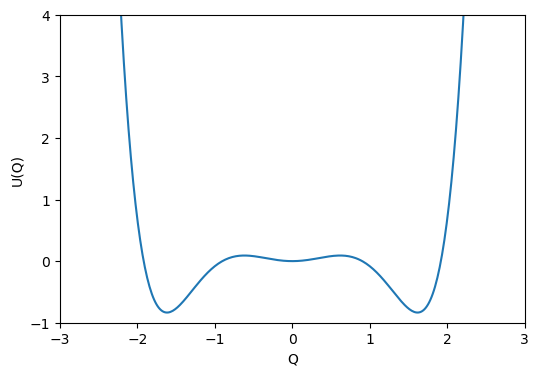

Minimum found near x0: [1.61614213]


In [5]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the potential energy function and its derivative
def U(Q, K=1, D=-3, F=1):
    return 0.5 * K * Q**2 + 0.25 * D * Q**4 + 0.167 * F * Q**6

# def dU(Q, K=1, D=-3, F=1):
#     return K * Q + D * Q**3 + F * Q**5

# Plot the potential energy function
Q_vals = np.linspace(-3, 3, 400)
U_vals = U(Q_vals)

plt.figure(figsize=(6, 4))
plt.plot(Q_vals, U_vals)
plt.xlabel('Q')
plt.ylabel('U(Q)')
plt.xlim(-3,3)
plt.ylim(-1,4)
plt.show()

# Minimization (finding the local minimum)
x0=1.8
min_result = minimize(U, x0)
print("Minimum found near x0:", min_result.x)


#### Bisection Method

Another method for root finding is **bisection**. This method is slower but more robust in cases where the function is continuous and crosses the x-axis.

You can use the `scipy.optimize.bisect` function to find roots by specifying an interval $[a, b]$ in which the root lies.

For more details on these methods and others, refer to the [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html).


### Assignment 2: Use either of the methods above to find the three minima and the value of the potential at those minima

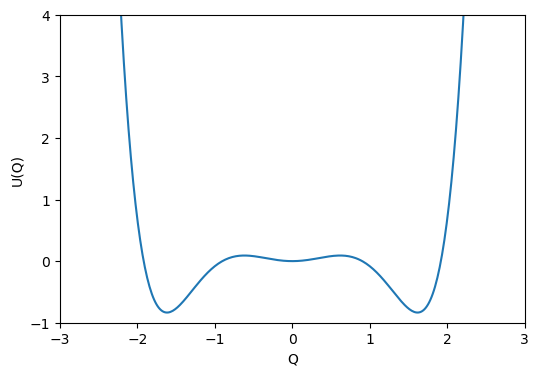

Minimum found near Q1: [-1.61614214]
Minimum found near Q2: [0.]
Minimum found near Q3: [1.61614213]
Value of U at Q1 [-0.83488702]
Value of U at Q2 [0.]
Value of U at Q3 [-0.83488702]


In [26]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the potential energy function and its derivative
def U(Q, K=1, D=-3, F=1):
    return 0.5 * K * Q**2 + 0.25 * D * Q**4 + 0.167 * F * Q**6

# def dU(Q, K=1, D=-3, F=1):
#     return K * Q + D * Q**3 + F * Q**5

# Plot the potential energy function
Q_vals = np.linspace(-3, 3, 400)
U_vals = U(Q_vals)

plt.figure(figsize=(6, 4))
plt.plot(Q_vals, U_vals)
plt.xlabel('Q')
plt.ylabel('U(Q)')
plt.xlim(-3,3)
plt.ylim(-1,4)
plt.show()

# Minimization (finding the local minimum)
x1 = -1.8
x2 = 0
x3 = 1.8
min_result = minimize(U, x1)
min_result2 = minimize(U, x2)
min_result3 = minimize(U, x3)
print("Minimum found near Q1:", min_result.x)
print("Minimum found near Q2:", min_result2.x)
print("Minimum found near Q3:", min_result3.x)

#
print("Value of U at Q1", U(min_result.x))
print("Value of U at Q2", U(min_result2.x))
print("Value of U at Q3", U(min_result3.x))
#

### 3a. Reading in Data from a File

It's common to work with data stored in files outside of `Jupyter Notebook`. These files can have various formats such as text files (e.g., `.txt`, `.csv`) containing rows of numerical data.

#### Loading Data with NumPy
- `numpy.loadtxt`: A simple and efficient way to load numerical data from a text file, assuming the data is well-structured (e.g., no missing values).
- `numpy.genfromtxt`: A more flexible function that can handle missing values or different delimiters.

We will first load the `data_0.txt` file as an example, which contains two columns of data.

You should start by inspecting the data by opening the data from `Jupyter Notebook` `Home` or using `vim` from the terminal.


Loaded Data from 'data_0.txt':
[[ 0.          1.        ]
 [ 1.          0.81873075]
 [ 2.          0.67032005]
 [ 3.          0.54881164]
 [ 4.          0.44932896]
 [ 5.          0.36787944]
 [ 6.          0.30119421]
 [ 7.          0.24659696]
 [ 8.          0.20189652]
 [ 9.          0.16529889]
 [10.          0.13533528]
 [11.          0.11080316]
 [12.          0.09071795]
 [13.          0.07427358]
 [14.          0.06081006]
 [15.          0.04978707]]


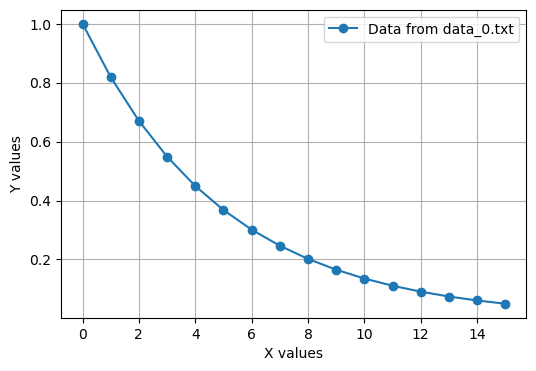

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from 'data_0.txt' file
# This should work if you launched Jupyter Notebook in the directory where the data is.
# If you are getting an error, you may need to change the path to where 'data.txt' is. 
data_0 = np.loadtxt('data_0.txt') 

# Print the loaded data from 'data_0.txt'
print("Loaded Data from 'data_0.txt':")
print(data_0)

# Plot the loaded data
plt.figure(figsize=(6, 4))
plt.plot(data_0[:, 0], data_0[:, 1], 'o-', label='Data from data_0.txt')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.legend()
plt.show()


#### Loading Data from `data.txt`

That was pretty straightforward, but often data is messier. In what follows, we will look at some data I put together which has many of the points randomly removed. It will still plot pretty nicely, but it has been downsampled from 2500 points to around 400 points.

After loading `data.txt` we will use it for interpolation, resampling, and integration.

Again, the file `data.txt` contains numerical data in two columns, similar to `data_0.txt`. Take a look with in `Home` or by using `vim`.

In the plot below, if you change the plot range, you should be able to see regions where the spacing between points on the x-axis is changing, due to the downsampling procedure I used.

First 25 lines from 'data.txt':
[[ 0.04        1.2314063 ]
 [ 1.37        1.55608407]
 [ 3.38        0.43168869]
 [ 5.26        0.86508992]
 [ 6.18        0.86674694]
 [ 7.34        0.49539907]
 [ 8.93        0.61120967]
 [10.14        0.66421855]
 [11.85        0.3628786 ]
 [12.99        0.41254365]
 [14.11        0.45540758]
 [15.56        0.3475007 ]
 [17.32        0.30538696]
 [18.95        0.3021475 ]
 [20.41        0.24197289]
 [22.24        0.23162893]
 [23.74        0.21038008]]


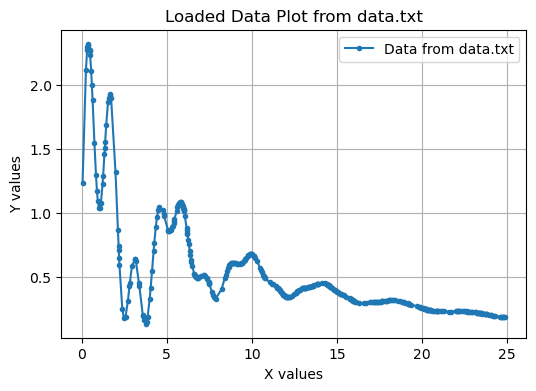

In [32]:
# Load data from 'data.txt' file
data = np.loadtxt('data.txt')

# Print the loaded data from 'data.txt'
print("First 25 lines from 'data.txt':")
print(data[0::24])

# Plot the loaded data
plt.figure(figsize=(6, 4))
plt.plot(data[:, 0], data[:, 1], '.-', label='Data from data.txt')
plt.title('Loaded Data Plot from data.txt')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.legend()
plt.show()


# of data points from 'data.txt':
[[ 0.04        1.2314063 ]
 [24.82        0.18522914]]


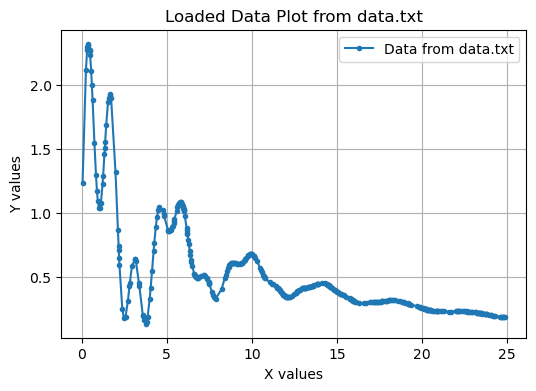

In [37]:
#Cell to edit

# Load data from 'data.txt' file
data = np.loadtxt('data.txt')

# Print the loaded data from 'data.txt'
print("# of data points from 'data.txt':")
print(data[0::399])

# Plot the loaded data
plt.figure(figsize=(6, 4))
plt.plot(data[:, 0], data[:, 1], '.-', label='Data from data.txt')
plt.title('Loaded Data Plot from data.txt')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.legend()
plt.show()


### 3b. Interpolation of Data

In many cases, we have data at specific points but need to estimate values between those points. This process is called **interpolation**.

We'll use `scipy.interpolate.interp1d` to perform interpolation on the data from `data.txt`.

Interpolation methods include:
- **Linear Interpolation**: Connects the points with straight lines.
- **Cubic Interpolation**: Connects points with a cubic function.

You can also use other interpolation orders and methods (e.g. quadratic order, and/or spline interpolation). Spline interpolation of n-th order gives you an n-differentiable interpolation.

Let's interpolate the data from `data.txt` and visualize the results. You'll need to zoom in to different regions to see where the interpolation and the original data set are different. Note that plotting software typically has built-in interpolation for the lines it generates. Many of them default to a linear interpolation.


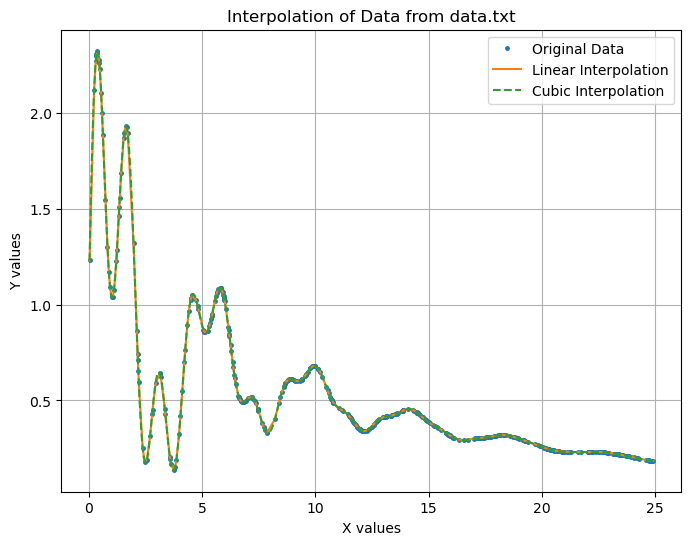

In [40]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

# Load data from 'data.txt' (if not already loaded)
data = np.loadtxt('data.txt')

# Separate the columns into X and Y
x_data = data[:, 0]
y_data = data[:, 1]

# Create linear and cubic interpolation functions
linear_interp = interp1d(x_data, y_data, kind='linear')
cubic_interp = interp1d(x_data, y_data, kind='cubic')

# Define a new set of x-values for interpolation
x_new = np.linspace(np.min(x_data), np.max(x_data), 500)

# Interpolate the data using both methods
y_linear = linear_interp(x_new)
y_cubic = cubic_interp(x_new)

# Plot the original data and the interpolated results
plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, '.', label='Original Data', markersize=5)
plt.plot(x_new, y_linear, '-', label='Linear Interpolation')
plt.plot(x_new, y_cubic, '--', label='Cubic Interpolation')
plt.title('Interpolation of Data from data.txt')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.legend()
plt.show()

#Note linear and cubic interpolation difference at local min, x = 8, & local max at x = 3
#added og data pts for visibility

### 3c. Resampling the Data on a Regular Grid

It is normal for real data to be irregularly spaced. It is sometimes useful to resample data onto a regular grid for analysis. This is common in temporal signal analysis. We can use the interpolation schemes to help with this.

Resampling involves:
1. Defining a new, evenly spaced set of x-values (regular grid).
2. Using interpolation to estimate the corresponding y-values on this grid.

Let's resample the data from `data.txt` onto a regular grid using both linear and cubic interpolation methods. Again, you'll need to zoom in to see the differences.


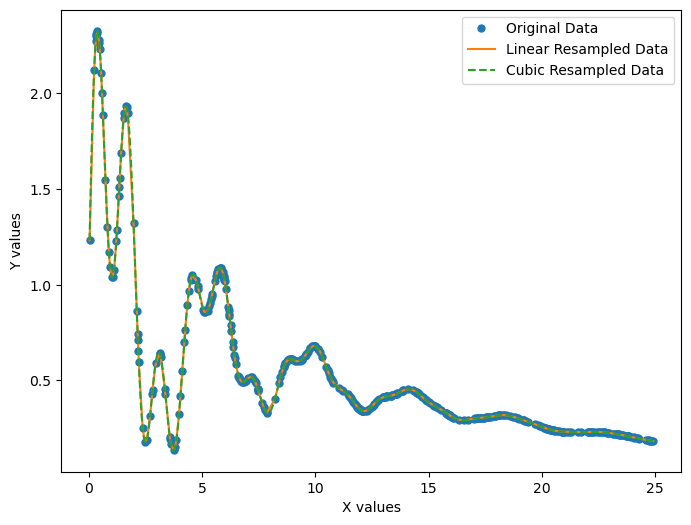

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load data from 'data.txt' (if not already loaded)
data = np.loadtxt('data.txt')

# Separate the columns into X and Y
x_data = data[:, 0]
y_data = data[:, 1]

# Define a regular grid for x-values (e.g., 500 evenly spaced points)
x_regular = np.linspace(np.min(x_data), np.max(x_data), 500)

# Create linear and cubic interpolation functions
linear_interp = interp1d(x_data, y_data, kind='linear')
cubic_interp = interp1d(x_data, y_data, kind='cubic')

# Use the interpolation functions to resample the data onto the regular grid
y_linear_resampled = linear_interp(x_regular)
y_cubic_resampled = cubic_interp(x_regular)

# Plot the original data and the resampled data
plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, 'o', label='Original Data', markersize=5)
plt.plot(x_regular, y_linear_resampled, '-', label='Linear Resampled Data')
plt.plot(x_regular, y_cubic_resampled, '--', label='Cubic Resampled Data')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()


#### Explanation

- **Regular Grid**: We created a new set of x-values evenly spaced between the minimum and maximum x-values in the original data. This is called a **regular grid**.
- **Linear and Cubic Interpolation**: We resampled the y-values on this grid using both linear and cubic interpolation methods.

This resampled data can now be used for further analysis, such as numerical integration, or simply for smoothing the original data. Resampling on a regular grid can also be helpful when using certain numerical methods that require evenly spaced data points.


### 3d. Integration of Data

If we have data points, we can use numerical methods to approximate the integral of the data.

#### Numerical Integration
- **Trapezoidal Rule**: This method approximates the area under the curve by dividing it into trapezoids.
- **Simpson’s Rule**: A more accurate method, especially for smooth curves, which fits parabolas to segments of the data.

We'll use the following methods from `scipy.integrate`:
- `trapezoid`: Implements the trapezoidal rule.
- `simpson`: Implements Simpson’s rule.

We will also compare the numerical results to an analytical integral of the function:
$$
f(x) = \frac{1}{\sqrt{1 + x^2}}
$$

Let's start by integrating the function above, then we can move onto our data.

Numerical Integration (Trapezoidal Rule): 2.9982145738089105
Numerical Integration (Simpson's Rule): 2.9982229473921933


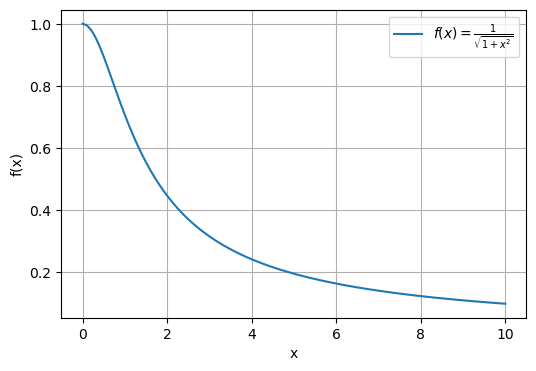

In [10]:
import numpy as np
from scipy.integrate import trapezoid, simpson
import matplotlib.pyplot as plt

# Define the function to integrate
def f(x):
    return 1 / np.sqrt(1 + x**2)

# Define the x-values from 0 to 1
x_values = np.linspace(0, 10, 100)

# Compute the corresponding y-values using the function
y_values = f(x_values)

# Perform numerical integration using trapezoidal and Simpson's rule
trapezoid_result = trapezoid(y_values, x=x_values)
simpson_result = simpson(y_values, x=x_values)

# Print the results
print(f"Numerical Integration (Trapezoidal Rule): {trapezoid_result}")
print(f"Numerical Integration (Simpson's Rule): {simpson_result}")

# Plot the function for visualization
plt.figure(figsize=(6, 4))
plt.plot(x_values, y_values, label=r'$f(x) = \frac{1}{\sqrt{1 + x^2}}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


### Assignment: Use `SymPy.integrals.integrate` to find the analytic result of the integral above and compare your answer with the analytic value

In [73]:
import sympy as sp

x = sp.symbols('x')
f = 1 / sp.sqrt(1 + x**2)


integral = sp.integrate(f, (x, 0, 100))

print(integral)
# integral works; need definite
#indefinite: integral = sp.integrate(f, x)



asinh(100)


Now let's try to integrate the resampled `data.txt` file and see what we get.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import trapezoid, simpson

# Load data from 'data.txt' (if not already loaded)
data = np.loadtxt('data.txt')

# Separate the columns into X and Y
x_data = data[:, 0]
y_data = data[:, 1]

# Resample the data on a regular grid using cubic interpolation
x_regular = np.linspace(np.min(x_data), np.max(x_data), 400)
cubic_interp = interp1d(x_data, y_data, kind='cubic')
y_cubic_resampled = cubic_interp(x_regular)

# Perform numerical integration on the resampled data using Trapezoidal and Simpson's rule
trapezoid_result = trapezoid(y_cubic_resampled, x_regular)
simpson_result = simpson(y_cubic_resampled, x=x_regular)

print(f"Numerical Integration (Trapezoidal Rule): {trapezoid_result}")
print(f"Numerical Integration (Simpson's Rule): {simpson_result}")


Numerical Integration (Trapezoidal Rule): 13.012141005713682
Numerical Integration (Simpson's Rule): 13.014056535251376


## Assignment: The real value of the integral before my random downsampling was about 13.0747. By changing our resampling, how close can we get? Explain.